# Aproksymacja wielomianowa

Biblioteka numpy zawiera procedury do aproksymacji. W szczególności:
* liniowej [`numpy.linalg.lstsq`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html),
* wielomianowej [`numpy.polyfit`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html),

In [42]:
import matplotlib.pyplot as plt
import numpy as np
#from scipy.interpolate import interp1d
#from scipy.interpolate import lagrange
#from scipy.interpolate import BarycentricInterpolator

Plik `AVERAGE300aprox.dat` zawiera dane **już oczyszczone**.

In [43]:
data = np.loadtxt("AVERAGE300aprox.dat")

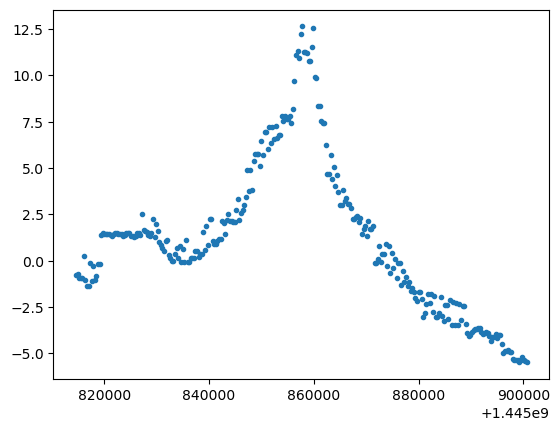

In [44]:
plt.plot(data[:,0],data[:,1],'.')
plt.show()

Dokonamy najprostszej aproksymacji wielomianem stopnia trzeciego, używając funkcji `polyfit()`.

Funkcja zwraca współczynniki wielomianu (w przypadku gdy stopień, jak w przykładzie jest równy 3)
$$z_0 x^3 + z_1 x^2 + z_2 x + z_3$$

In [45]:
z = np.polyfit(data[:,0],data[:,1], 3)

/tmp/ipykernel_48737/2984338948.py:1: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(data[:,0],data[:,1], 3)


Jak widać funkcja informuje, że zadanie jest źle uwarunkowane. Wynika to (w tym przypadku) z tego, że wartości $x$ są bardzo duże (gdyż reprezentują czas bezwzględny w sekundach). Bardzo łatwo zamienić je na wartości reprezentujące czas względny (względem początku doby) w sekundach odejmując od każdej wartości odciętej minimum.

In [46]:
tmin = min(data[:,0])
data[:,0] = data[:,0] - tmin
z = np.polyfit(data[:,0],data[:,1], 3)

Jak widać jest wyraźnie lepiej (nie pojawia się komunikat).

`z` jest tablicą zwierającą współczynniki wielomianu. Zwracam uwagę, że ze względu na spore wartości $x$ (liczba sekund w ciągu doby) współczynniki są bardzo małe. Grozi to utratą dokładności podczas obliczeń. Można spróbować zamienić sekundy na godziny dzieląc odcięte przez 3600.

Jeszcze lepsze efekty osiągniemy normalizując odcięte danych do zakresu $[-1, 1]$. Daje to szansę, że skrajne wartości podnoszone do dużych nawet potęg będą przyjmowały sensowniejsze wartości.

In [47]:
z

array([-1.50077850e-15, -4.89454863e-09,  3.67306502e-04, -2.29165068e+00])

In [48]:
data[:,0] = data[:,0]/3600.
z = np.polyfit(data[:,0],data[:,1], 3)
z

array([-7.00203219e-05, -6.34333503e-02,  1.32230341e+00, -2.29165068e+00])

Współczynniki wielomianu uległy modyfikacji, za wyjątkiem ostatniego $z_3$ reprezentującego wartość funkcji w punkcie 0.

Do manipulacji na wielomianie warto używac funkcji [`poly1d()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.poly1d.html) 

In [49]:
wielomian = np.poly1d(z)

In [50]:
wielomian(0.)

-2.2916506803099552

In [51]:
wielomian(24)

-8.061939600234517

Obejrzyjmy na wykresie rezultat aproksymacji.

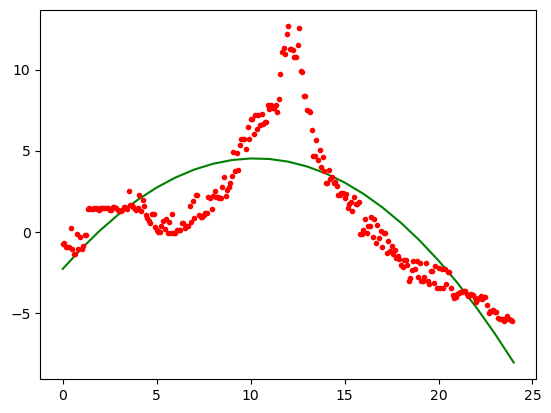

In [52]:
x=np.linspace(0, 24, 25)
plt.plot(x, wielomian(x),'g-',data[:,0], data[:,1], 'r.')
plt.show()

Przybliżenie nie jest idealne, ale (w pewnym sense) oddaje charakter dobowych zmian temperatury: w ciągu doby rosną, a na zakończenie dnia temperatura jest mniejsza niż na jego początku.

Niech `N` będzie to stopień wielomianu interpolującego. W poniższym przykłądzie można dowlonie(?) zmieniać `N` i przeliczać…

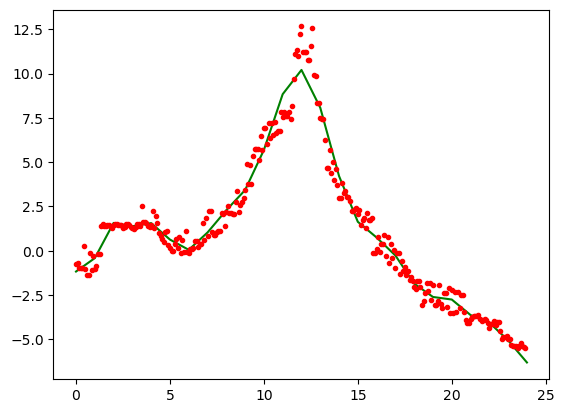

In [53]:
N = 18
plt.plot(x, np.poly1d(np.polyfit(data[:,0],data[:,1], N))(x),'g-', data[:,0], data[:,1], 'r.')
plt.show()

Zobaczmy jak wyglądają różnice wartości prawdziwej i aproksymowanej.

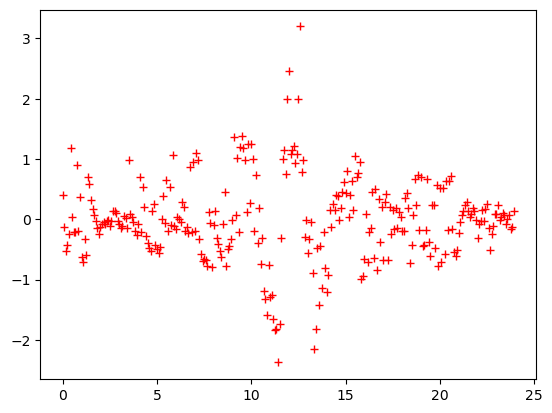

In [54]:
err = data[:,1] - np.poly1d(np.polyfit(data[:,0],data[:,1], N))(data[:,0])
plt.plot(data[:,0], err,'r+')
plt.show()

Generalnie nie jest źle: wartości skupiają się wokół zera w sposób dosyć symetryczny. Zobaczmy histogram.

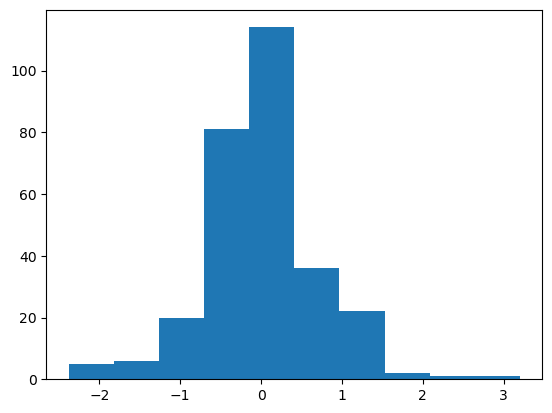

In [55]:
plt.hist(err)
plt.show()

Nie do końca przypomina on histogram rozkłądu normalnego, ale nie jest ,,najgorszy''.

Można też zdefiniować sobie funkcję (na przykład `wykres`) i korzystać z niej w celu zobaczenia rezultatu aproksymacji.

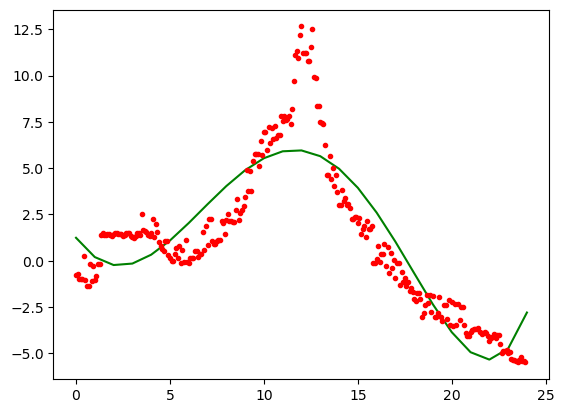

In [56]:
def wykres(N):
    plt.plot(x, np.poly1d(np.polyfit(data[:,0],data[:,1], N))(x),'g-', data[:,0], data[:,1], 'r.')
    plt.show()
wykres(5)

Można też zabawić się w wykres interakcyjny, w którym suwaczkiem zmieniamy wartość parametru. Ale to już jakaś magia…

In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def wykres_wykres(N):
    x=np.linspace(0, 24, 25)
    plt.figure(2)
    plt.plot(x, np.poly1d(np.polyfit(data[:,0],data[:,1], N))(x),'g-', data[:,0], data[:,1], 'r.')
    # plt.ylim(-5, 5)
    plt.show()

interact(wykres_wykres, N=(0, 20, 1))

interactive(children=(IntSlider(value=10, description='N', max=20), Output()), _dom_classes=('widget-interact'…

<function __main__.wykres_wykres(N)>

Dla $N=0$ dostajemy średnią temperaturę dobową, a dla $N=1$ trend — temperatura spada. 

Również dla kolejnych wartości $N$ można znaleźć jakąś interpretację…

Niestety, dla $N >18$ funkcja informuje, że zadanie staje się źle uwarunkowane. Jest to znowu związane z tym, że wartości $x$ podniesiona do potęgi 19 czy 20 staje się baaaardzo duża: 

In [58]:
24.**20

4.0199887178406037e+27

Spójrzmy zatem na to co składa się na wartość wielomainu dla czasu $x$.

In [59]:
N = 19
xx = 24
a=np.polyfit(data[:,0],data[:,1], N)

/tmp/ipykernel_48737/1609438084.py:3: RankWarning: Polyfit may be poorly conditioned
  a=np.polyfit(data[:,0],data[:,1], N)


In [60]:
for i in range(0, N):
    print(a[i]*xx**(N-i))

-11330430778.06616
91342736306.6091
-323834800769.04285
649899323944.504
-768172795486.4868
429091869552.32983
186799262961.87442
-623110337607.5316
652217561383.1304
-426056443213.51587
193785444891.98138
-63304473283.09258
14896509267.88344
-2489298903.0242367
286451801.67652124
-21519874.499598633
960889.4402711384
-21263.38890348738
173.30434995233878


Jak widać sumowane są liczby o bardzo dużej rozpiętości wartości. Musi prowadzić to do problemów…

Oryginalny notatnik dostępny pod adresem: [Aproksymacja.ipynb](https://myszka.kmim.wm.pwr.edu.pl/uploads/numeryczne/jupyter/Aproksymacja.ipynb)